<a href="https://colab.research.google.com/github/younggon2/Education-ComputerVision-DeepLearning/blob/master/Day2-2%20Python%20CNN%20(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network(CNN)
## MLP의 한계와 CNN의 등장
#####딥러닝 초기</br>
- 회귀 및 분류와 같은 모든 종류의 Task들에 MLP를 사용</br>

#####한계점</br>
1. 이미지의 Resolution에 따라 매개변수가 기하급수적으로 늘어나야 함.</br>
ex)단순한 1채널의 16x16의 이미지 Input으로 1000가지 Output을 뽑아내기 위한 파라미터 수는 256,000개가 필요(bais 제외) </br>
 하나의 Layer를 통과하기 위한 Computing Resource가 과하게 필요함.
2. 근본적으로 이미지를 다루는데 있어 MLP는 Pixel별로 독립적인 가중치를 필요로 하기 때문에 공간적 특성을 고려하지 못하는 Network

3. MLP는 하나의 인풋이 모든 아웃풋에 관여하지만 인풋 간의 관계성은 등한시되는 반면 CNN은 convolution filter가 window sliding을 하며 업데이트를 이어나가게 되고 이를 바탕으로 local한 인풋은 서로 weight sharing을 하는, 서로 관계가 비슷할 것이라는 가정이 들어가게 된다.

#####CNN의 등장 배경
- 파라미터 수를 줄이자
- 이미지 데이터 특성을 잘 살리자
1. 공간적 특성
2. 근접한 픽셀간 종속성
3. 이미지 내 유사한 패턴의 반복</br>
위와 같은 특성을 잘 살릴 수 있는 Network의 필요로 CNN(Convolution Neural Network)이 등장 </br>

#####CNN이란?
- 2D형태의 Filter (Kernel)를 활용하여  Input Image와 Convolution연산을 통해 공간적인 특징을 추출해내는 NN(Neural Network)

## Convolution
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcPtdq9%2FbtqwmRy4Egz%2FllFioGfP6HwRPlM0qSVkV1%2Fimg.png)
</br>[그림6-1]Input과 Kernel의 Convolution[10]</br>
Convolution연산이란?</br>
원소간의 곱셈 그리고 총합(위 그림 참조)</br></br>
Input Image와 Fiter간의 Convolution연산을 통해 나온 Output Image를 Feature Map이라 부름</br></br>

CNN의 가중치</br>
= Filter Matrix속 각각의 원소 </br></br>
하나의 Filter는 전체 이미지를 Silding Window기법을 통해 이미지를 지나가며 매번 Convolution연산</br>
=>Filter Matrix를 공유할 수 있어 매개변수의 개수에 이점을 가짐</br></br></br>

Question) Convolution Layer를 이용하여 1채널의 16x16 이미지에 1000개의 Output을 내야한다 했을 때 CNN은 한 레이어에 필요한 매개변수의 개수는?(단, Filter size = (3,3) )</br></br></br>
Question) 위 문제에서 32x32 이미지로 변경했을 때 필요한 매개변수의 개수는?</br></br></br>




Answer) 3x3x1000=9000(bias를 제외)</br>
 9000개의 파라미터로 하나의 convolution layer가 구성 </br>






참고) 원소별 곱셈연산이 필요하기 때문에 연산 횟수 측면에서 더 많은 computing resource를 필요로 한다는 단점도 있음
## Pooling

## Stride




### CNN Explainer : https://poloclub.github.io/cnn-explainer/


## Convolution의 Backpropagation
- 첨부 자료 참조


##CNN을 파이썬으로 구현하기

#### for문을 이용한 1채널 Input Convolution

In [14]:
import numpy as np
from numpy.random import randint

def sigmoid(x): return 1 / (1 + np.exp(-x))

#
H_in, W_in = 5, 7

#
F = 3

#
X = randint(0, 10, (H_in, W_in))

#
W = randint(0, 10, (F, F))

#
B = randint(0, 10, ())

print ('X: ')
print (X)
print ('W: ')
print (W)

H_out, W_out = H_in - F + 1, W_in - F + 1
Z = np.empty(shape=(H_out, W_out))

for row_idx in range(H_out):
    for col_idx in range(W_out):
        window = X[row_idx : row_idx + F,
                   col_idx : col_idx + F]
        z = np.sum(window * W) + B
        Z[row_idx, col_idx] = z
        # A = sigmoid(Z)
        A = Z
print(A.shape)
print(A)


X: 
[[8 3 1 9 9 9 2]
 [5 5 9 8 1 5 0]
 [1 9 2 4 9 8 8]
 [5 3 8 4 8 1 3]
 [3 5 3 0 7 3 9]]
W: 
[[6 3 6]
 [3 1 5]
 [1 7 0]]
(3, 5)
[[197. 167. 162. 257. 171.]
 [152. 218. 180. 207. 116.]
 [146. 152. 154. 178. 199.]]


#### for문을 이용한 3채널 Input Convolution

In [15]:
import numpy as np

H_in, W_in = 5, 7 # row 개수, column 개수
C_in = 3 # color 차원
F = 3 # filter_ size
C_out = 5 # 출력되는 차원의 수


color_img = np.random.normal(0, 1, (H_in, W_in, C_in))
filter_ = np.random.normal(0, 1, (F, F, C_in, C_out)) # filter_의 층은 C_in과 동일하게 유지시키며 내부차원 C_out 추가
B = np.random.normal(0, 1, (C_out)) # bias는 C_out의 개수만큼 필요

H_out, W_out = H_in - F + 1, W_in - F + 1
Z = np.empty(shape=(H_out, W_out, C_out)) # Z의 shape의 내부차원은 C_out

for C_out_idx in range(C_out): # C_out만큼 for loop를 모두 돌려주어야함.
    c_filter = filter_[..., C_out_idx]  # c_filter를 통해 어떤 filter와 연산해줄지 정해주기
    c_b = B[C_out_idx]                 # c_b를 통해 filter에 해당하는 bias 정해주기
    for H_out_idx in range(H_out):
        for W_out_idx in range(W_out):
            window = color_img[H_out_idx : H_out_idx + F,
                               W_out_idx : W_out_idx + F, ...]
            z = np.sum(window*c_filter)+c_b
            Z[H_out_idx, W_out_idx, C_out_idx] = z
            A = 1 / (1 + np.exp (-Z)) # activation function

print(A.shape)
print(A)

# print(A)

(3, 5, 5)
[[[9.97878311e-01 9.12194104e-01 4.03360770e-01 1.57473132e-02
   9.43268383e-01]
  [8.46531423e-01 9.98662415e-01 6.13092524e-01 6.23257253e-04
   9.04446291e-01]
  [9.99505166e-01 1.46490170e-04 9.69941668e-01 1.15036137e-01
   8.57093604e-02]
  [1.25664392e-03 5.31440323e-02 4.43183178e-01 6.37566991e-03
   7.41594479e-01]
  [4.39495618e-05 9.81583224e-01 9.15610469e-01 6.20352821e-02
   9.57022574e-01]]

 [[9.96849221e-01 5.77205011e-04 5.34430504e-01 9.86851245e-01
   8.67406469e-01]
  [4.55005573e-01 9.90356822e-01 4.96825304e-01 9.99992921e-01
   5.68094575e-01]
  [6.95557988e-01 9.99619395e-01 9.98271781e-01 1.41417430e-02
   4.95821680e-01]
  [9.80841053e-01 9.99993200e-01 9.94067743e-01 2.54531860e-01
   9.98304164e-01]
  [5.56228161e-01 9.87691815e-01 8.54541402e-01 4.80122643e-02
   2.26411201e-01]]

 [[3.53269973e-01 3.70914908e-01 4.33986657e-02 3.18870106e-01
   3.93390463e-01]
  [4.99709665e-03 5.49227641e-03 1.98487951e-02 4.99921190e-02
   9.99072078e-01]
  

<ipython-input-15-40c1bc9fdd01>:25: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp (-Z)) # activation function


#### for문을 제거한 Convolution

In [16]:
import numpy as np
from numpy.random import randint

def sigmoid(x): return 1 / (1 + np.exp(-x))

H_in, W_in = 5, 7
F = 3
X = randint(0, 10, (H_in, W_in))
W = randint(0, 10, (F, F))
B = randint(0, 10, ())
H_out, W_out = H_in - F + 1, W_in - F + 1
Z = np.empty(shape=(H_out, W_out))

row_idx = np.repeat(np.arange(F), F).reshape(1, -1)
row_idx = row_idx + np.arange(H_out).reshape(-1, 1)
row_idx = np.repeat(row_idx, repeats=W_out, axis=0)

col_idx = np.tile(np.arange(F), F).reshape(1, -1)
col_idx = col_idx + np.arange(W_out).reshape(-1, 1)
col_idx = np.tile(col_idx, reps=[H_out, 1])
print(X)
print(X[row_idx, col_idx])


[[4 3 5 9 8 9 6]
 [1 6 5 6 7 4 6]
 [5 2 5 1 6 3 7]
 [5 0 2 5 4 4 0]
 [0 2 8 1 7 5 8]]
[[4 3 5 1 6 5 5 2 5]
 [3 5 9 6 5 6 2 5 1]
 [5 9 8 5 6 7 5 1 6]
 [9 8 9 6 7 4 1 6 3]
 [8 9 6 7 4 6 6 3 7]
 [1 6 5 5 2 5 5 0 2]
 [6 5 6 2 5 1 0 2 5]
 [5 6 7 5 1 6 2 5 4]
 [6 7 4 1 6 3 5 4 4]
 [7 4 6 6 3 7 4 4 0]
 [5 2 5 5 0 2 0 2 8]
 [2 5 1 0 2 5 2 8 1]
 [5 1 6 2 5 4 8 1 7]
 [1 6 3 5 4 4 1 7 5]
 [6 3 7 4 4 0 7 5 8]]


Reference :  https://github.com/parasdahal/deepnet/blob/master/run_cnn.py

## 1. Data N수
## 2. Feaure map, Filters -  visualization
## 3. Weight sharing
## 4. translation equivariance and invariance
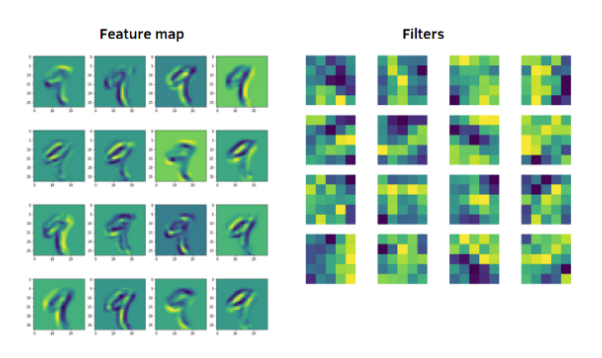

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcCDRuJ%2Fbtq0JyaWMp9%2FU9kDot974HmIwKrKtTTZ9k%2Fimg.jpg)

## CNN by python

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def get_im2col_indices(x_shape, field_height=3, field_width=3, padding=1, stride=1):
  # First figure out what the size of the output should be
  N, C, H, W = x_shape
  assert (H + 2 * padding - field_height) % stride == 0
  assert (W + 2 * padding - field_height) % stride == 0
  out_height = (H + 2 * padding - field_height) / stride + 1
  out_width = (W + 2 * padding - field_width) / stride + 1

  i0 = np.repeat(np.arange(field_height,dtype='int32'), field_width)
  i0 = np.tile(i0, C)
  i1 = stride * np.repeat(np.arange(out_height,dtype='int32'), out_width)
  j0 = np.tile(np.arange(field_width), field_height * C)
  j1 = stride * np.tile(np.arange(out_width,dtype='int32'), int(out_height))
  i = i0.reshape(-1, 1) + i1.reshape(1, -1)
  j = j0.reshape(-1, 1) + j1.reshape(1, -1)

  k = np.repeat(np.arange(C,dtype='int32'), field_height * field_width).reshape(-1, 1)

  return (k, i, j)

def im2col_indices(x, field_height=3, field_width=3, padding=1, stride=1):
  """ An implementation of im2col based on some fancy indexing """
  # Zero-pad the input
  p = padding
  x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

  k, i, j = get_im2col_indices(x.shape, field_height, field_width, padding,
                               stride)

  cols = x_padded[:, k, i, j]
  C = x.shape[1]
  cols = cols.transpose(1, 2, 0).reshape(field_height * field_width * C, -1)
  return cols


def col2im_indices(cols, x_shape, field_height=3, field_width=3, padding=1,
                   stride=1):
  """ An implementation of col2im based on fancy indexing and np.add.at """
  N, C, H, W = x_shape
  H_padded, W_padded = H + 2 * padding, W + 2 * padding
  x_padded = np.zeros((N, C, H_padded, W_padded), dtype=cols.dtype)
  k, i, j = get_im2col_indices(x_shape, field_height, field_width, padding,
                               stride)
  cols_reshaped = cols.reshape(C * field_height * field_width, -1, N)
  cols_reshaped = cols_reshaped.transpose(2, 0, 1)
  np.add.at(x_padded, (slice(None), k, i, j), cols_reshaped)
  if padding == 0:
    return x_padded
  return x_padded[:, :, padding:-padding, padding:-padding]

pass

In [18]:
class Conv():

    def __init__(self, X_dim, n_filter, h_filter, w_filter, stride, padding):
        self.count_ = 1

        self.d_X, self.h_X, self.w_X = X_dim

        self.n_filter, self.h_filter, self.w_filter = n_filter, h_filter, w_filter
        self.stride, self.padding = stride, padding

        self.W = np.random.randn(
            n_filter, self.d_X, h_filter, w_filter) / np.sqrt(n_filter / 2.)
        self.b = np.zeros((self.n_filter, 1))
        self.params = [self.W, self.b]

        self.h_out = (self.h_X - h_filter + 2 * padding) / stride + 1
        self.w_out = (self.w_X - w_filter + 2 * padding) / stride + 1

        if not self.h_out.is_integer() or not self.w_out.is_integer():
            raise Exception("Invalid dimensions!")

        self.h_out, self.w_out = int(self.h_out), int(self.w_out)
        self.out_dim = (self.n_filter, self.h_out, self.w_out)

        self.h_filter=h_filter
        self.w_filter=w_filter

        self.out= None

    def forward(self, X):
        ''' (32, 9)
            (32, 100352)
            (32, 28, 28, 128)
            (128, 32, 28, 28)
        '''
        self.n_X = X.shape[0]
        self.X_col = im2col_indices(
            X, self.h_filter, self.w_filter, stride=self.stride, padding=self.padding)
        W_row = self.W.reshape(self.n_filter, -1)

        if self.count_ == 1 :
          plt.figure(figsize=(15,10))
          for j in range(self.n_filter):
            plt.subplot(8,4,j+1)
            plt.imshow(self.W[j].reshape(self.h_filter,-1))
            plt.title(f'Filter {j}',fontsize=8)
            plt.axis('off')
          plt.show()

        out = W_row @ self.X_col + self.b
        out = out.reshape(self.n_filter, self.h_out, self.w_out, self.n_X)
        out = out.transpose(3, 0, 1, 2)
        self.out = out

        if self.count_ == 1 :
          self.count_+=1
          plt.figure(figsize=(15,10))
          for i in range(len(out[0])):
            plt.subplot(8,4, i+1)
            # print(f'Filter{i},Feature map')
            plt.imshow(out[0][i])
            plt.title(f'Feature map {i}',fontsize=8)
            plt.axis('off')
          plt.show()
          print(out.shape)

        # print(np.shape(out))
        # if global_count < 1 :
        #   plt.imshow(out[0][0])
        #   plt.show()
        #   g_count=+1

        return out

    def backward(self, dout):

        dout_flat = dout.transpose(1, 2, 3, 0).reshape(self.n_filter, -1)

        dW = dout_flat @ self.X_col.T
        dW = dW.reshape(self.W.shape)

        db = np.sum(dout, axis=(0, 2, 3)).reshape(self.n_filter, -1)

        W_flat = self.W.reshape(self.n_filter, -1)

        dX_col = W_flat.T @ dout_flat
        shape = (self.n_X, self.d_X, self.h_X, self.w_X)
        dX = col2im_indices(dX_col, shape, self.h_filter,
                            self.w_filter, self.padding, self.stride)


        return dX, [dW, db]


class Maxpool():

    def __init__(self, X_dim, size, stride):
        self.count_ = 1
        self.d_X, self.h_X, self.w_X = X_dim

        self.params = []

        self.size = size
        self.stride = stride

        self.h_out = (self.h_X - size) / stride + 1
        self.w_out = (self.w_X - size) / stride + 1

        if not self.h_out.is_integer() or not self.w_out.is_integer():
            raise Exception("Invalid dimensions!")

        self.h_out, self.w_out = int(self.h_out), int(self.w_out)
        self.out_dim = (self.d_X, self.h_out, self.w_out)
        self.out = None

    def forward(self, X):
        self.n_X = X.shape[0]
        X_reshaped = X.reshape(
            X.shape[0] * X.shape[1], 1, X.shape[2], X.shape[3])

        self.X_col = im2col_indices(
            X_reshaped, self.size, self.size, padding=0, stride=self.stride)

        self.max_indexes = np.argmax(self.X_col, axis=0)
        out = self.X_col[self.max_indexes, range(self.max_indexes.size)]

        out = out.reshape(self.h_out, self.w_out, self.n_X,
                          self.d_X).transpose(2, 3, 0, 1)
        self.out = out
        if self.count_ == 1 :
          self.count_+=1
          print(out.shape)

        return out

    def backward(self, dout):

        dX_col = np.zeros_like(self.X_col)
        # flatten the gradient
        dout_flat = dout.transpose(2, 3, 0, 1).ravel()

        dX_col[self.max_indexes, range(self.max_indexes.size)] = dout_flat

        # get the original X_reshaped structure from col2im
        shape = (self.n_X * self.d_X, 1, self.h_X, self.w_X)
        dX = col2im_indices(dX_col, shape, self.size,
                            self.size, padding=0, stride=self.stride)
        dX = dX.reshape(self.n_X, self.d_X, self.h_X, self.w_X)
        return dX, []


class Flatten():

    def __init__(self):
        self.params = []
        self.out = None

    def forward(self, X):
        self.X_shape = X.shape
        self.out_shape = (self.X_shape[0], -1)
        out = X.ravel().reshape(self.out_shape)
        self.out_shape = self.out_shape[1]
        self.out = out
        return out

    def backward(self, dout):
        out = dout.reshape(self.X_shape)
        return out, ()


class FullyConnected():

    def __init__(self, in_size, out_size):

        self.W = np.random.randn(in_size, out_size) / np.sqrt(in_size / 2.)
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.out=None

    def forward(self, X):
        self.X = X
        out = self.X @ self.W + self.b
        self.out=out
        return out

    def backward(self, dout):
        dW = self.X.T @ dout
        db = np.sum(dout, axis=0)
        dX = dout @ self.W.T
        return dX, [dW, db]


class Batchnorm():

    def __init__(self, X_dim):
        self.d_X, self.h_X, self.w_X = X_dim
        self.gamma = np.ones((1, int(np.prod(X_dim))))
        self.beta = np.zeros((1, int(np.prod(X_dim))))
        self.params = [self.gamma, self.beta]

    def forward(self, X):
        self.n_X = X.shape[0]
        self.X_shape = X.shape

        self.X_flat = X.ravel().reshape(self.n_X, -1)
        self.mu = np.mean(self.X_flat, axis=0)
        self.var = np.var(self.X_flat, axis=0)
        self.X_norm = (self.X_flat - self.mu) / np.sqrt(self.var + 1e-8)
        out = self.gamma * self.X_norm + self.beta

        return out.reshape(self.X_shape)

    def backward(self, dout):

        dout = dout.ravel().reshape(dout.shape[0], -1)
        X_mu = self.X_flat - self.mu
        var_inv = 1. / np.sqrt(self.var + 1e-8)

        dbeta = np.sum(dout, axis=0)
        dgamma = np.sum(dout * self.X_norm, axis=0)

        dX_norm = dout * self.gamma
        dvar = np.sum(dX_norm * X_mu, axis=0) * - \
            0.5 * (self.var + 1e-8)**(-3 / 2)
        dmu = np.sum(dX_norm * -var_inv, axis=0) + dvar * \
            1 / self.n_X * np.sum(-2. * X_mu, axis=0)
        dX = (dX_norm * var_inv) + (dmu / self.n_X) + \
            (dvar * 2 / self.n_X * X_mu)

        dX = dX.reshape(self.X_shape)
        return dX, [dgamma, dbeta]


class Dropout():

    def __init__(self, prob=0.5):
        self.prob = prob
        self.params = []

    def forward(self, X):
        self.mask = np.random.binomial(1, self.prob, size=X.shape) / self.prob
        out = X * self.mask
        return out.reshape(X.shape)

    def backward(self, dout):
        dX = dout * self.mask
        return dX, []


class ReLU():
    def __init__(self):
        self.params = []

    def forward(self, X):
        self.X = X
        return np.maximum(0, X)

    def backward(self, dout):
        dX = dout.copy()
        dX[self.X <= 0] = 0
        return dX, []


class sigmoid():
    def __init__(self):
        self.params = []

    def forward(self, X):
        out = 1.0 / (1.0 + np.exp(X))
        self.out = out
        return out

    def backward(self, dout):
        dX = dout * self.out * (1 - self.out)
        return dX, []


class tanh():
    def __init__(self):
        self.params = []

    def forward(self, X):
        out = np.tanh(X)
        self.out = out
        return out

    def backward(self, dout):
        dX = dout * (1 - self.out**2)
        return dX, []

In [19]:
from sklearn.utils import shuffle
import copy

def get_minibatches(X, y, minibatch_size,shuffleTag=True):
    m = X.shape[0]
    minibatches = []
    if shuffleTag:
        X, y = shuffle(X, y)
    for i in range(0, m, minibatch_size):
        X_batch = X[i:i + minibatch_size, :, :, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
    return minibatches


def vanilla_update(params, grads, learning_rate=0.01):
    for param, grad in zip(params, reversed(grads)):
        for i in range(len(grad)):
            param[i] += - learning_rate * grad[i]


def momentum_update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, param, grad, in zip(velocity, params, reversed(grads)):
        for i in range(len(grad)):
            v[i] = mu * v[i] + learning_rate * grad[i]
            param[i] -= v[i]


def adagrad_update(cache, params, grads, learning_rate=0.01):
    for c, param, grad, in zip(cache, params, reversed(grads)):
        for i in range(len(grad)):
            cache[i] += grad[i]**2
            param[i] += - learning_rate * grad[i] / (np.sqrt(cache[i]) + 1e-8)


def rmsprop_update(cache, params, grads, learning_rate=0.01, decay_rate=0.9):
    for c, param, grad, in zip(cache, params, reversed(grads)):
        for i in range(len(grad)):
            cache[i] = decay_rate * cache[i] + (1 - decay_rate) * grad[i]**2
            param[i] += - learning_rate * grad[i] / (np.sqrt(cache[i]) + 1e-4)


def sgd(nnet, X_train, y_train, minibatch_size, epoch, learning_rate, verbose=True,
        X_test=None, y_test=None):
    minibatches = get_minibatches(X_train, y_train, minibatch_size)
    for i in range(epoch):
        loss = 0
        if verbose:
            print("Epoch {0}".format(i + 1))
        for X_mini, y_mini in minibatches:
            loss, grads = nnet.train_step(X_mini, y_mini)
            vanilla_update(nnet.params, grads, learning_rate=learning_rate)
        if verbose:
            train_acc = accuracy(y_train, nnet.predict(X_train))
            test_acc = accuracy(y_test, nnet.predict(X_test))
            print("Loss = {0} | Training Accuracy = {1} | Test Accuracy = {2}".format(
                loss, train_acc, test_acc))
    return nnet

def sgd_rnn(nnet, X_train, y_train, minibatch_size, epoch, learning_rate, verbose=True):
    for i in range(epoch):
        loss = 0
        if verbose:
            print("Epoch {0}".format(i + 1))
        hidden_state = nnet.initial_state
        loss, grads, hidden_state = nnet.train_step(X_train, y_train, hidden_state)

        for k in grads.keys():
            nnet.model[k] -= learning_rate * grads[k]

        if verbose:
            print("Loss = {0}".format(loss))
    return nnet


def sgd_momentum(nnet, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9,
                 verbose=True, X_test=None, y_test=None, nesterov=True):

    minibatches = get_minibatches(X_train, y_train, minibatch_size)

    for i in range(epoch):
        if i == 1 :
          print(nnet.layers[0].out.shape)
          # print(nnet.layers[1].out.shape)
          print(nnet.layers[2].out.shape)
          print(nnet.layers[3].out.shape)
        if i == 9 :
          plt.figure(figsize=(15,10))
          for j in range(nnet.layers[0].n_filter):
            plt.subplot(8,4,j+1)
            plt.imshow(nnet.layers[0].W[j].reshape(nnet.layers[0].h_filter,-1))
            plt.title(f'Filter {j}',fontsize=8)
            plt.axis('off')
          plt.show()
          plt.figure(figsize=(15,10))
          for i in range(len(nnet.layers[0].out[0])):
            plt.subplot(8,4, i+1)
            # print(f'Filter{i},Feature map')
            plt.imshow(nnet.layers[0].out[0][i])
            plt.title(f'Feature map {i}',fontsize=8)
            plt.axis('off')
          plt.show()
          print(nnet.layers[0].out.shape)
          # print(nnet.layers[1].out.shape)
          print(nnet.layers[2].out.shape)
          print(nnet.layers[3].out.shape)
        loss = 0
        velocity = []
        for param_layer in nnet.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        if verbose:
            print("Epoch {0}".format(i + 1))

        for X_mini, y_mini in minibatches:

            if nesterov:
                for param, ve in zip(nnet.params, velocity):
                    for i in range(len(param)):
                        param[i] += mu * ve[i]

            loss, grads = nnet.train_step(X_mini, y_mini)
            momentum_update(velocity, nnet.params, grads,
                            learning_rate=learning_rate, mu=mu)

        if verbose:
            m_train = X_train.shape[0]
            m_test = X_test.shape[0]
            y_train_pred = np.array([], dtype="int64")
            y_test_pred = np.array([], dtype="int64")
            for i in range(0, m_train, minibatch_size):
                X_tr = X_train[i:i + minibatch_size, :, :, :]
                y_tr = y_train[i:i + minibatch_size, ]
                y_train_pred = np.append(y_train_pred, nnet.predict(X_tr))
            for i in range(0, m_test, minibatch_size):
                X_te = X_test[i:i + minibatch_size, :, :, :]
                y_te = y_test[i:i + minibatch_size, ]
                y_test_pred = np.append(y_test_pred, nnet.predict(X_te))

            train_acc = accuracy(y_train, y_train_pred)
            test_acc = accuracy(y_test, y_test_pred)
            print("Training Accuracy = {0} | Test Accuracy = {1}".format(
                 train_acc, test_acc))
    return nnet

In [20]:
import _pickle as cPickle
import gzip
import os


def one_hot_encode(y, num_class):
    m = y.shape[0]
    onehot = np.zeros((m, num_class), dtype="int32")
    for i in range(m):
        idx = y[i]
        onehot[i][idx] = 1
    return onehot


def accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)  # both are not one hot encoded


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def load_mnist(path, num_training=50000, num_test=10000, cnn=True, one_hot=False):
    f = gzip.open(path, 'rb')
    training_data, validation_data, test_data = cPickle.load(
        f, encoding='iso-8859-1')
    f.close()
    X_train, y_train = training_data
    X_validation, y_validation = validation_data
    X_test, y_test = test_data
    if cnn:
        shape = (-1, 1, 28, 28)
        X_train = X_train.reshape(shape)
        X_validation = X_validation.reshape(shape)
        X_test = X_test.reshape(shape)
    if one_hot:
        y_train = one_hot_encode(y_train, 10)
        y_validation = one_hot_encode(y_validation, 10)
        y_test = one_hot_encode(y_test, 10)
    X_train, y_train = X_train[range(
        num_training)], y_train[range(num_training)]
    X_test, y_test = X_test[range(num_test)], y_test[range(num_test)]
    return (X_train, y_train), (X_test, y_test)


In [21]:
def l2_regularization(layers, lam=0.001):
    reg_loss = 0.0
    for layer in layers:
        if hasattr(layer, 'W'):
            reg_loss += 0.5 * lam * np.sum(layer.W * layer.W)
    return reg_loss


def delta_l2_regularization(layers, grads, lam=0.001):
    for layer, grad in zip(layers, reversed(grads)):
        if hasattr(layer, 'W'):
            grad[0] += lam * layer.W
    return grads


def l1_regularization(layers, lam=0.001):
    reg_loss = 0.0
    for layer in layers:
        if hasattr(layer, 'W'):
            reg_loss += lam * np.sum(np.abs(layer.W))
    return reg_loss


def delta_l1_regularization(layers, grads, lam=0.001):
    for layer, grad in zip(layers, reversed(grads)):
        if hasattr(layer, 'W'):
            grad[0] += lam * layer.W / (np.abs(layer.W) + 1e-8)
    return grads


def SoftmaxLoss(X, y):
    m = y.shape[0]
    p = softmax(X)
    log_likelihood = -np.log(p[range(m), y])
    loss = np.sum(log_likelihood) / m

    dx = p.copy()
    dx[range(m), y] -= 1
    dx /= m
    return loss, dx

In [22]:
class CNN:

    def __init__(self, layers, loss_func=SoftmaxLoss):
        self.layers = layers
        self.params = []
        for layer in self.layers:
            self.params.append(layer.params)
        self.loss_func = loss_func

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, dout):
        grads = []
        for layer in reversed(self.layers):
            dout, grad = layer.backward(dout)
            grads.append(grad)
        return grads

    def train_step(self, X, y):
        out = self.forward(X)
        loss, dout = self.loss_func(out, y)
        loss += l2_regularization(self.layers)
        grads = self.backward(dout)
        grads = delta_l2_regularization(self.layers, grads)
        return loss, grads

    def predict(self, X):
        X = self.forward(X)
        return np.argmax(softmax(X), axis=1)



In [23]:
import sys

def make_mnist_cnn(X_dim, num_class):
    conv = Conv(X_dim, n_filter=32, h_filter=3,
                w_filter=3, stride=1, padding=1)
    relu_conv = ReLU()
    maxpool = Maxpool(conv.out_dim, size=2, stride=1)
    flat = Flatten()
    fc = FullyConnected(np.prod(maxpool.out_dim), num_class)
    return [conv, relu_conv, maxpool, flat, fc]


In [24]:
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
#load data
(train_images, train_labels), (test_images,test_labels) = load_data()
shape = (-1, 1, 28, 28)
train_images = train_images.reshape(shape)
test_images = test_images.reshape(shape)
train_images=train_images[:1000]
test_images=test_images[:500]
train_labels=train_labels[:1000]
test_labels=test_labels[:500]

Epoch 1


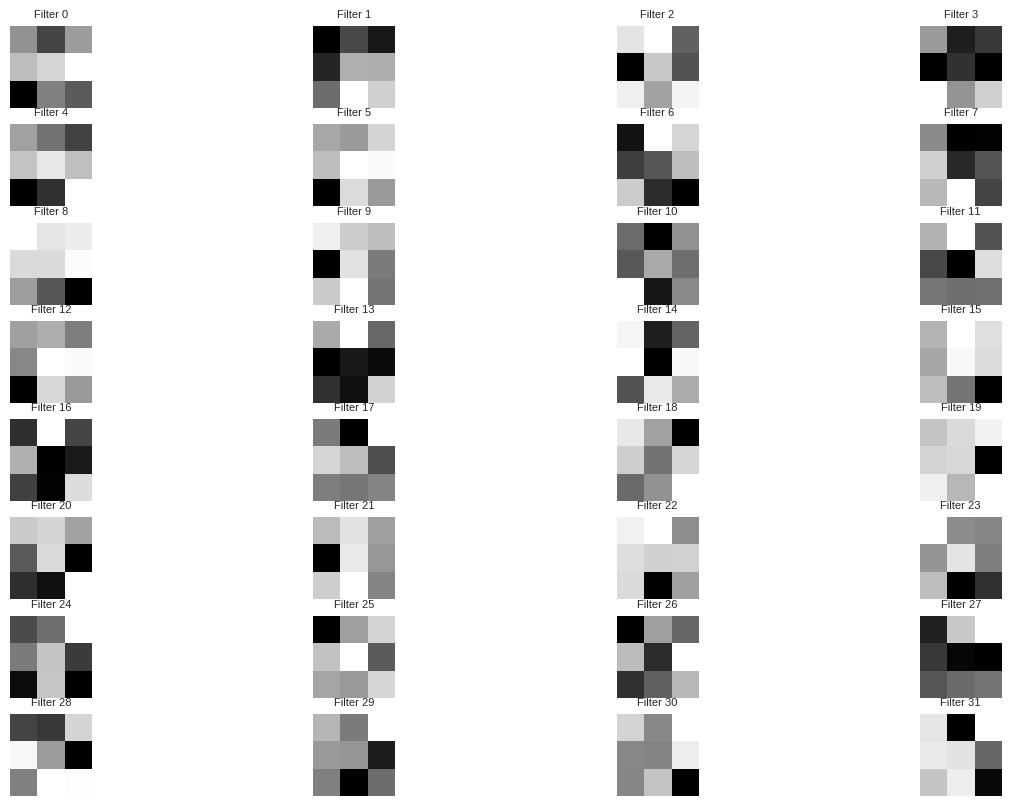

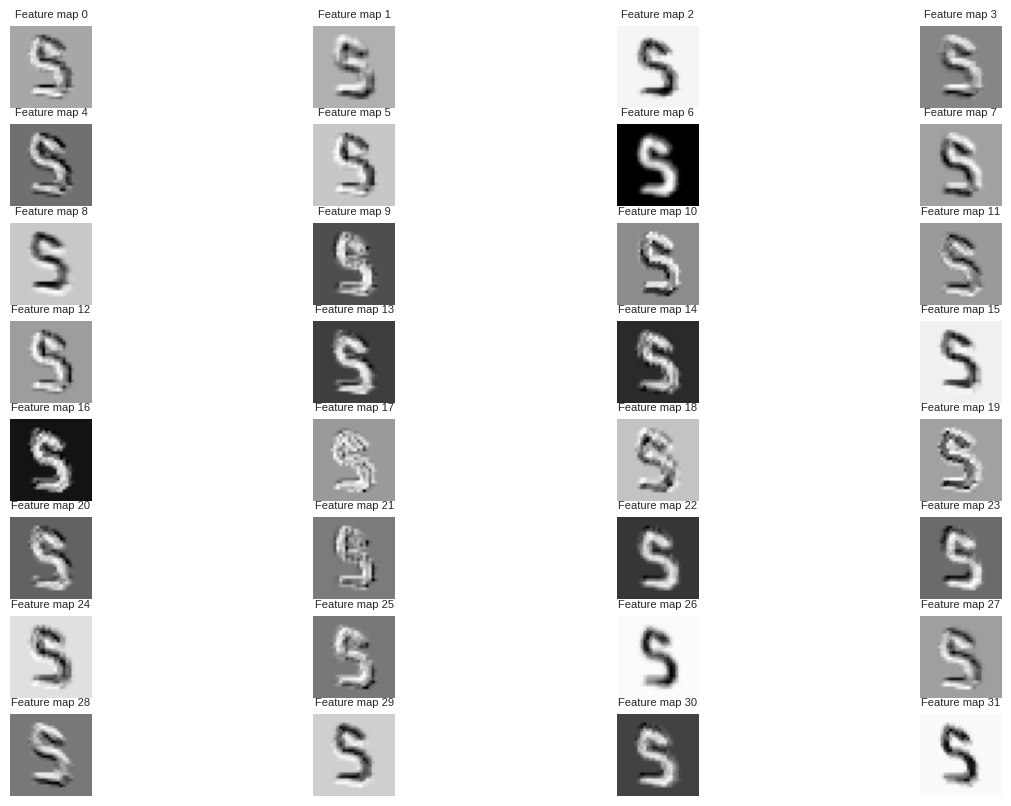

(64, 32, 28, 28)
(64, 32, 27, 27)


<ipython-input-21-de63d0f2a786>:34: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(p[range(m), y])


Training Accuracy = 0.599 | Test Accuracy = 0.456
(52, 32, 28, 28)
(52, 32, 27, 27)
(52, 23328)
Epoch 2
Training Accuracy = 0.65 | Test Accuracy = 0.472
Epoch 3
Training Accuracy = 0.816 | Test Accuracy = 0.714
Epoch 4
Training Accuracy = 0.847 | Test Accuracy = 0.7
Epoch 5
Training Accuracy = 0.869 | Test Accuracy = 0.668
Epoch 6
Training Accuracy = 0.906 | Test Accuracy = 0.72
Epoch 7
Training Accuracy = 0.979 | Test Accuracy = 0.798
Epoch 8
Training Accuracy = 0.992 | Test Accuracy = 0.81
Epoch 9
Training Accuracy = 0.999 | Test Accuracy = 0.812


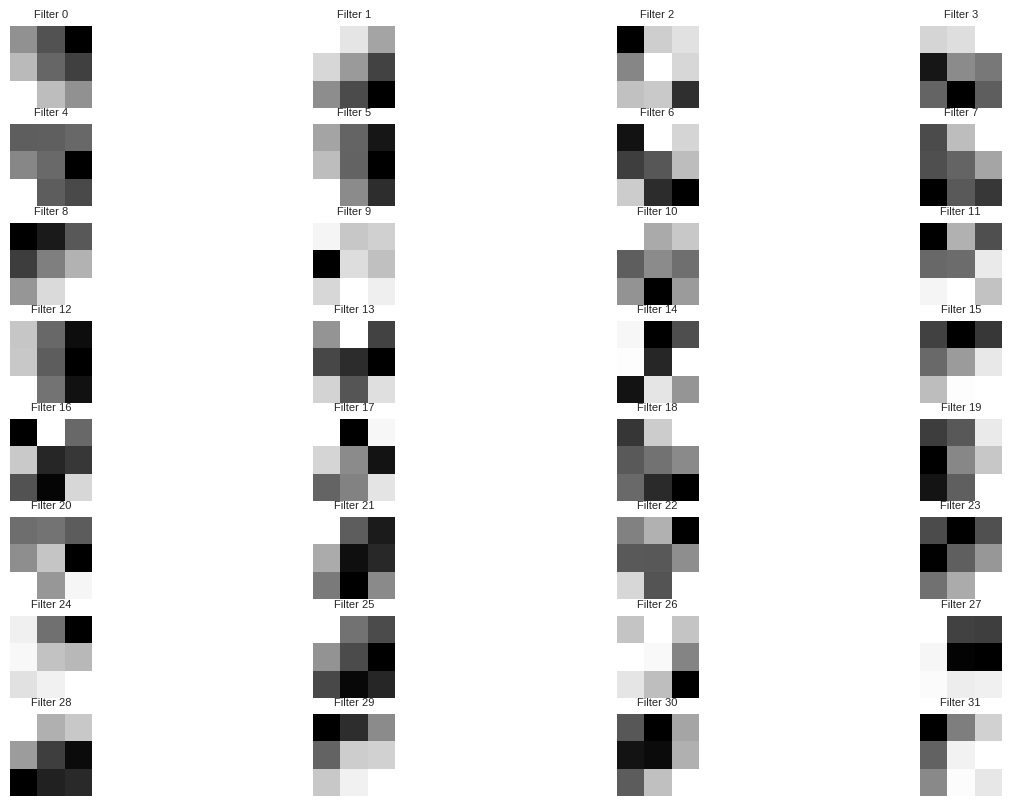

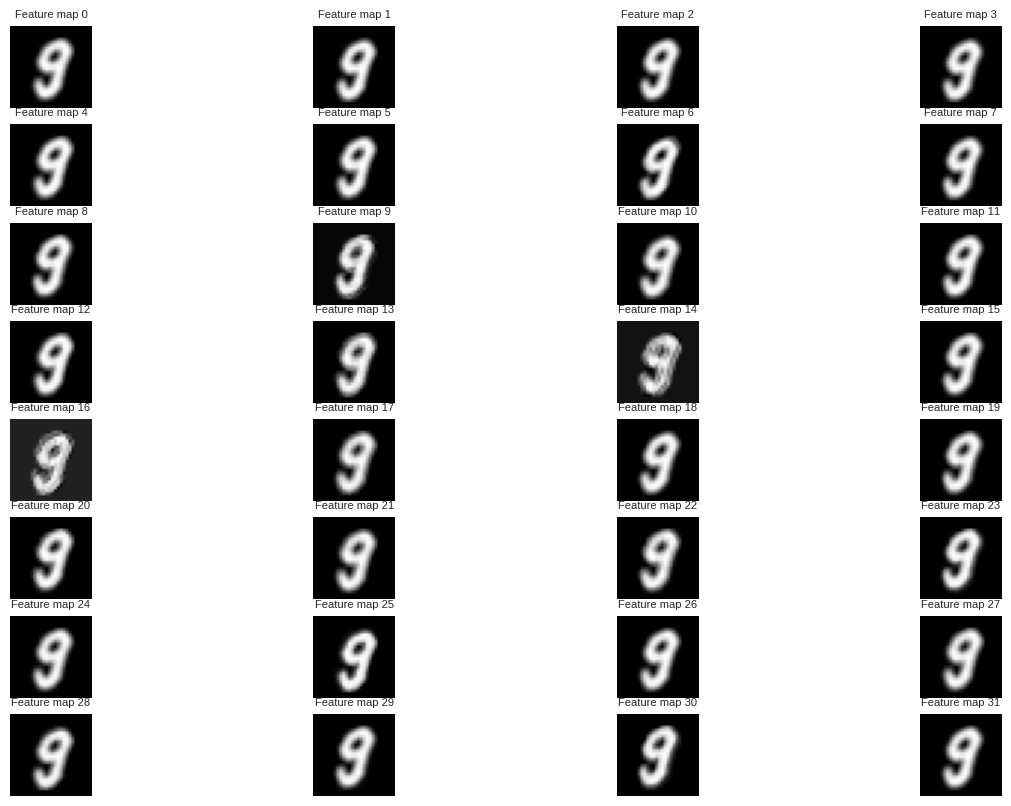

(52, 32, 28, 28)
(52, 32, 27, 27)
(52, 23328)
Epoch 32
Training Accuracy = 0.999 | Test Accuracy = 0.828


In [30]:
#CNN training
mnist_dims = (1, 28, 28)
cnn = CNN(make_mnist_cnn(mnist_dims, num_class=10))
cnn = sgd_momentum(cnn, train_images, train_labels, minibatch_size=64, epoch=10,
                    learning_rate=0.01, X_test=test_images, y_test=test_labels)